In [0]:
import pandas as pd
from six.moves import cPickle
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving drugs_test.csv to drugs_test.csv
Saving drugs_train.csv to drugs_train.csv


In [0]:
## Loading of the test and train data
df1 = pd.read_csv("drugs_train.csv")
df2 = pd.read_csv("drugs_test.csv")

In [0]:
df=pd.concat([df1,df2])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [0]:
df.shape

(215063, 7)

In [0]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [0]:
print("unique values count of df : " ,len(set(df['uniqueID'].values)))
print("length of df : " ,df.shape[0])

unique values count of df :  215063
length of df :  215063


In [0]:
df.groupby(["drugName"]).count().head()

,uniqueID,condition,review,rating,date,usefulCount
drugName,,,,,,
A + D Cracked Skin Relief,1,1,1,1,1,1
A / B Otic,2,2,2,2,2,2
Abacavir / dolutegravir / lamivudine,70,70,70,70,70,70
Abacavir / lamivudine,3,3,3,3,3,3
Abacavir / lamivudine / zidovudine,1,1,1,1,1,1


In [0]:
##We have a data(Reviews) of 3671 medicines
df.groupby(["drugName"]).count().shape

(3671, 6)

In [0]:
###we have 916 different conditions
df.groupby(['condition']).count().shape

(916, 6)

In [0]:
df["condition"].unique()


array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [0]:
### Data Preprocessing
### There are some conditions data is missing or incorrect data is filled lets delete those rows
for i in df["condition"].unique():
    if type(i)==str:
        if i[0]=="0" or i[0]=="1" or i[0]=="2" or i[0]=='3' or i[0]=="4" or i[0]=="5" or i[0]=="6" or i[0]=="7" or i[0]=="8" or i[0]=="9":
            df = df[(df.condition != i) ]

In [0]:
df.shape

(213892, 7)

In [0]:
### to check null values  in each column
df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [0]:
df=df.dropna()

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

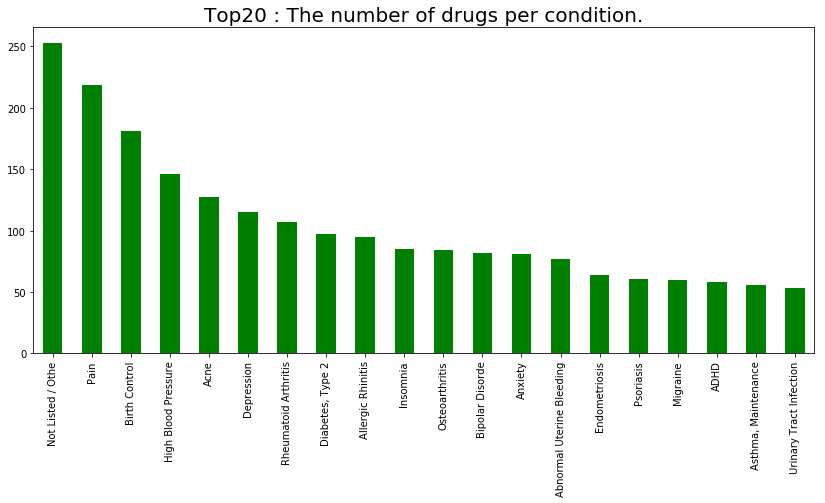

In [0]:
### total no. of drugs per condition(Top 20)
condition_drugs = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_drugs[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [0]:
#count of conditions with respect to drug
df_condition=df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition=pd.DataFrame(df_condition).reset_index()
df_condition.head()

,condition,drugName
0,Not Listed / Othe,253
1,Pain,219
2,Birth Control,181
3,High Blood Pressure,146
4,Acne,127


Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

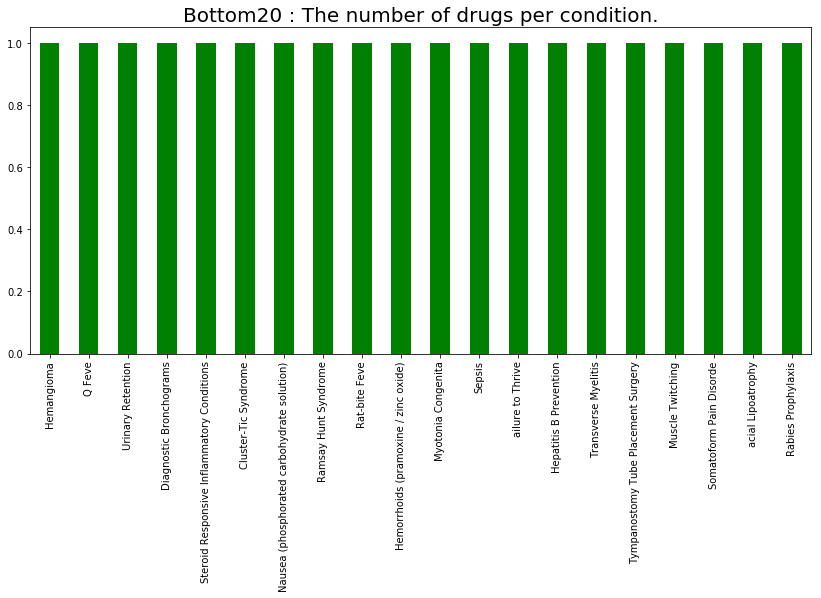

In [0]:
##The following are the bottom 20 conditions of 'drugs per condition'.
###As we can see, the number is all 1. Considering the recommendation system, it is not
###feasible to recommend with that when there is only one product. Therefore, we will analyze only the conditions 
###that have at least 2 drugs per condition.

condition_drugs = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_drugs[condition_drugs.shape[0]-20:condition_drugs.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [0]:
#making dataframe in which condition has only 1 drug  
df_condition=pd.DataFrame(df_condition[df_condition.drugName==1])
df_condition

,condition,drugName
701,"Uveitis, Posteri",1
702,"Pseudogout, Prophylaxis",1
703,Infectious Diarrhea,1
704,Thyroid Suppression Test,1
705,Angioedema,1
706,Scleroderma,1
707,mis,1
708,Anti NMDA Receptor Encephalitis,1
709,mist (,1
710,Pruritus of Partial Biliary Obstruction,1


In [0]:
#making list of those conditions
conditions=[]
for i in df_condition['condition']:
    conditions.append(i)

In [0]:
#removing those conditions which are in the list
for i in conditions:
    df=df[(df.condition != i) ]

In [0]:
df.shape

(212053, 7)

In [0]:
#### Recommendtion buidling
df['review'][1]

1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object

In [0]:
## Review preprocessing
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
## let's see what words are used as stopwords. There are many words that include not, like needn't. 
##These words are key parts of emotional analysis, so we will remove them from stopwords.
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stop_words.remove(i)

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid=SentimentIntensityAnalyzer 

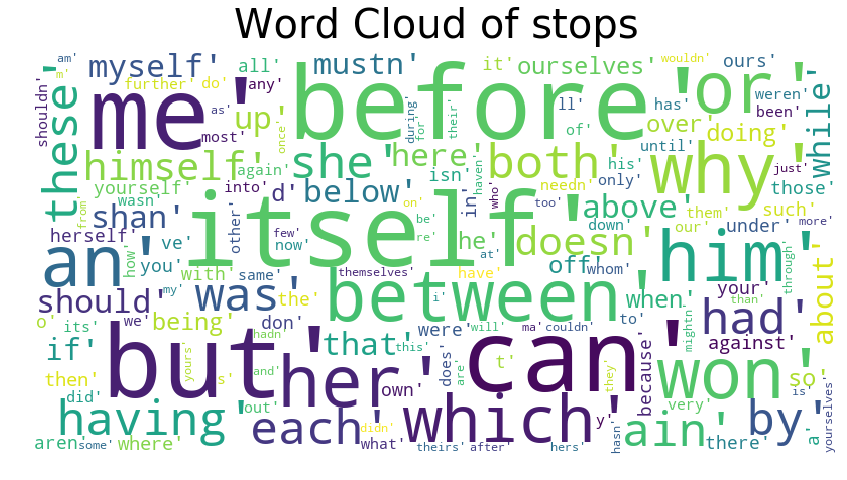

In [0]:
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12,8), 
                   title = None, title_size=40, image_color=False):
    stopwords = stop_words
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stop_words, title="Word Cloud of stops")

In [0]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop_words]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))


In [0]:
import re
%time df['review_clean'] = df['review'].apply(review_to_words)

CPU times: user 3min, sys: 1.04 s, total: 3min 2s
Wall time: 3min 2s


In [0]:
### sentiment analysis to make a rating for the drugs 
df['sentiment'] = df["rating"].apply(lambda x: 1 if x > 5 else 0)
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,no side effect take combin bystol mg fish oil,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept pill cycl happi...,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10,first time use form birth control glad went pa...,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...,1
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,nd day mg start work rock hard erect howev exp...,0
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,07-Mar-17,5,pull cum bit took plan b hour later took pregn...,0
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilifi chang life hope zoloft clonidin first ...,1
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,09-Aug-16,11,noth problem keppera constant shake arm leg pi...,0
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,08-Dec-16,1,pill mani year doctor chang rx chateal effect ...,1


In [0]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'])

# now extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

In [0]:
df['date'].unique

<bound method Series.unique of 0       2012-05-20
1       2010-04-27
2       2009-12-14
3       2015-11-03
4       2016-11-27
5       2015-11-28
6       2017-03-07
7       2015-03-14
8       2016-08-09
9       2016-12-08
10      2015-01-01
11      2017-03-09
12      2013-07-06
13      2017-09-07
14      2014-08-07
15      2017-01-19
16      2017-09-22
17      2017-03-15
18      2014-11-09
19      2015-09-01
20      2010-07-09
21      2016-04-03
22      2014-08-11
23      2017-09-16
24      2017-04-17
25      2015-12-14
26      2014-05-11
27      2017-01-12
28      2015-06-01
29      2012-10-16
           ...    
53736   2015-01-19
53737   2010-04-10
53738   2015-06-14
53739   2016-09-07
53740   2014-05-19
53741   2010-01-20
53742   2011-08-02
53743   2011-01-29
53744   2014-03-12
53745   2013-02-19
53746   2016-03-28
53747   2016-01-27
53748   2009-04-20
53749   2016-07-18
53750   2015-05-02
53751   2017-11-11
53752   2017-04-13
53753   2016-02-25
53754   2015-08-15
53755   2016-07-21


In [0]:
df['month'].unique

<bound method Series.unique of 0         5
1         4
2        12
3        11
4        11
5        11
6         3
7         3
8         8
9        12
10        1
11        3
12        7
13        9
14        8
15        1
16        9
17        3
18       11
19        9
20        7
21        4
22        8
23        9
24        4
25       12
26        5
27        1
28        6
29       10
         ..
53736     1
53737     4
53738     6
53739     9
53740     5
53741     1
53742     8
53743     1
53744     3
53745     2
53746     3
53747     1
53748     4
53749     7
53750     5
53751    11
53752     4
53753     2
53754     8
53755     7
53756    11
53757    10
53758     9
53759     8
53760     8
53761     9
53762    10
53763    11
53764    11
53765     9
Name: month, Length: 212053, dtype: int64>

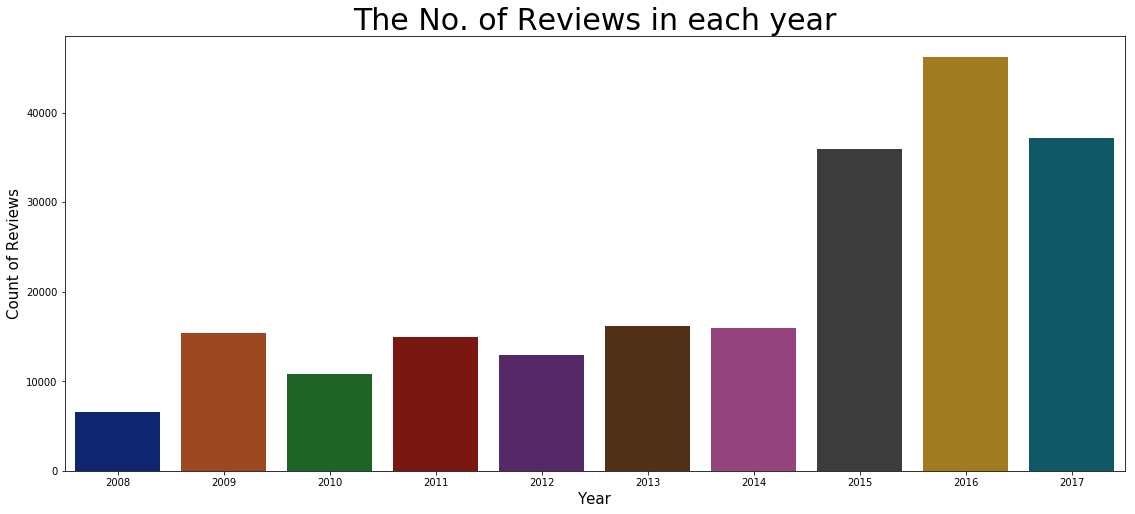

In [0]:
# looking at the no. of reviews in each of the year

import seaborn as sns
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(df['Year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

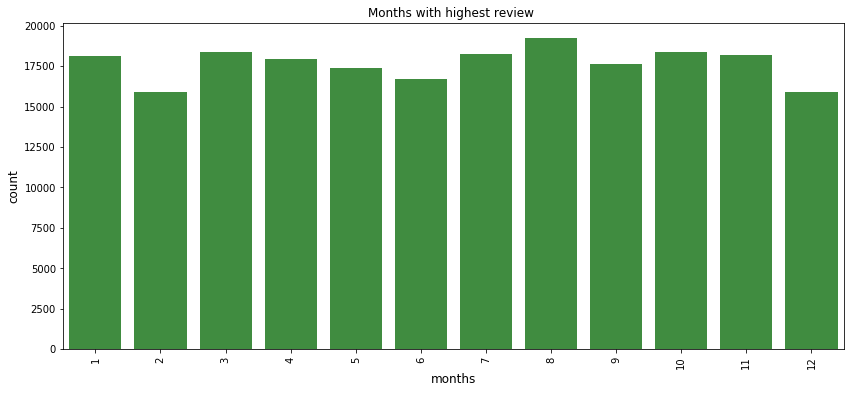

In [0]:
### No. of reviews month wise
month = df['month'].value_counts()     
month= month.sort_index()             
month
plt.figure(figsize=(14,6))
sns.barplot( month.index,month.values,alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('months', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Months with highest review ")
plt.show()

In [0]:
## To see review day wise
import calendar
#calendar.day_name[df['date'].weekday()]
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'].unique()

array(['Sunday', 'Tuesday', 'Monday', 'Saturday', 'Thursday', 'Friday',
       'Wednesday'], dtype=object)

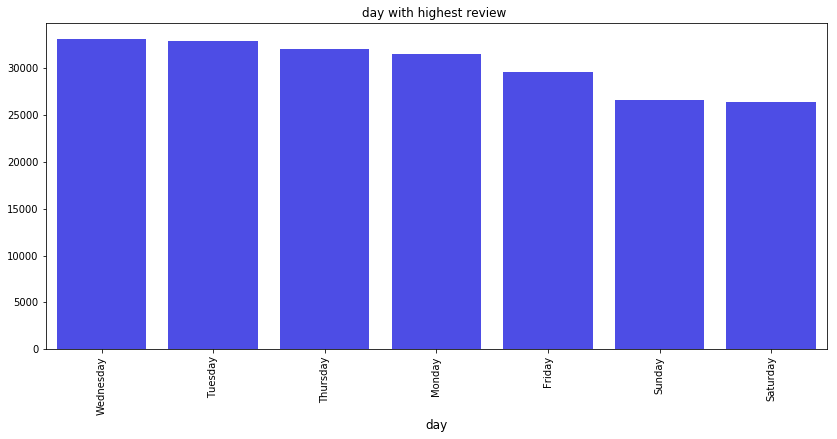

In [0]:
day=df['day_of_week'].value_counts()
year=day.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(day.index,day.values,alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('day', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("day with highest review ")
plt.show()                 #on wednesday ppl review maximum  ....so do something that ppl come back on a wednesday and review more 

In [0]:
### to see reviews season wise
df['season'] = df["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))
#1:spring
#2:Summer
#3:Fall
#4:Winter

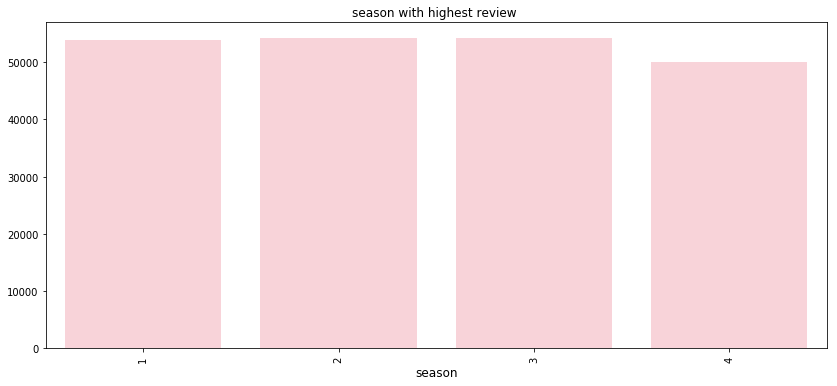

In [0]:
season=df['season'].value_counts()
season
season=season.sort_index()
season
plt.figure(figsize=(14,6))
sns.barplot(season.index,season.values,alpha=0.8, color='pink')
plt.xticks(rotation='vertical')
plt.xlabel('season', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("season with highest review ")
plt.show() 

In [0]:
# Now splitting the data into train and test for sentiment analysis
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42) 

In [0]:
print(df_train.shape)
print(df_test.shape)

(142075, 14)
(69978, 14)


In [0]:
df_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,Year,month,day,day_of_week,season
132074,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market ...",9,2010-11-26,102,tri near everi ssri market place pristiq impro...,1,2010,11,26,Friday,3
157748,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a deca...",9,2008-05-03,39,take month clear decad long infect,1,2008,5,3,Saturday,1
76458,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went b...",2,2016-04-21,15,work awhil pretti well went back mayb get hour...,0,2016,4,21,Thursday,1
19474,229747,Ketamine,Pain,"""I was given this after surgery for pain as I ...",1,2016-04-16,19,given surgeri pain morphin tri drug sort omg w...,0,2016,4,16,Saturday,1
51423,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month perio...",9,2016-12-16,5,abilifi serv well two month period antidepress...,1,2016,12,16,Friday,4
41290,94607,Abilify,Autism,"""Autistic Savant. High functioning. 5mg Abilif...",10,2015-10-15,61,autist savant high function mg abilifi everi m...,1,2015,10,15,Thursday,3
102062,151485,Chantix,Smoking Cessation,"""This medicine mucked my mind up:. I took it f...",1,2016-01-28,10,medicin muck mind took five year ago two month...,0,2016,1,28,Thursday,4
9225,230617,Depo-Provera,Endometriosis,"""I have been on this for the better part of th...",9,2010-04-01,8,better part last year love conveni deal time p...,1,2010,4,1,Thursday,1
161177,135134,Dapsone,Acne,"""Black female with cystic acne and dark spots ...",10,2011-12-02,76,black femal cystic acn dark spot cheek chin ha...,1,2011,12,2,Friday,4
3218,123353,Apri,Birth Control,"""Before I start my period, I get cramps, acne ...",7,2013-01-22,0,start period get cramp acn moodi pill sex driv...,1,2013,1,22,Tuesday,4


In [0]:
df_test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,Year,month,day,day_of_week,season
149492,126702,Brimonidine,Rosacea,"""Never , never , never use this cream !!!!!! I...",1,2015-08-31,17,never never never use cream help way angri dis...,0,2015,8,31,Monday,2
36737,84765,Ethinyl estradiol / norgestimate,Birth Control,"""I was switched to this after about 9 months o...",10,2016-05-01,3,switch month mononessa ask switch happen anywa...,1,2016,5,1,Sunday,1
87556,71559,Vraylar,Bipolar Disorde,"""I began at 1.5 then titrated to 3mg dosage. A...",3,2016-08-17,17,began titrat mg dosag first love medicin compl...,0,2016,8,17,Wednesday,2
44851,132320,Ativan,Anxiety,"""Ativan 0.5mg calms me down considerably withi...",5,2012-01-12,26,ativan mg calm consider within minut side effe...,0,2012,1,12,Thursday,4
91917,177278,Duloxetine,Generalized Anxiety Disorde,"""My thoughts on Cymbalta: Cymbalta has left me...",1,2017-05-03,29,thought cymbalta cymbalta left fog no feel non...,0,2017,5,3,Wednesday,1
83949,16570,Ethinyl estradiol / norethindrone,Abnormal Uterine Bleeding,"""Everything was all good until the 5 month I&#...",1,2015-12-01,2,everyth good month bleed month spot most break...,0,2015,12,1,Tuesday,4
137760,97016,Ambien,Insomnia,"""I have used this medicine off and on for 7 ye...",9,2014-12-08,126,use medicin year issu thing rememb need sure t...,1,2014,12,8,Monday,4
125048,171319,Wellbutrin,Depression,"""This drug has saved my life! I have struggle...",9,2017-07-01,60,drug save life struggl methamphetamin addict y...,1,2017,7,1,Saturday,2
121554,30173,Klonopin,Bipolar Disorde,"""I have been taking Wellbutrin SR for about 4 ...",9,2015-05-18,32,take wellbutrin sr yrs combo differ med think ...,1,2015,5,18,Monday,1
6925,37206,Vyvanse,ADHD,"""I&#039;ve been on vyvanse for about 2 days no...",9,2017-04-11,13,vyvans day believ differ two medic tri adderal...,1,2017,4,11,Tuesday,1


In [0]:
### creating a bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
## n gram is used to capture the emotions of the user
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
pipeline = Pipeline([
    ('vect', vectorizer),])
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [0]:
df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,Year,month,day,day_of_week,season
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,no side effect take combin bystol mg fish oil,1,2012,5,20,Sunday,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv becam concern ...,1,2010,4,27,Tuesday,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,use take anoth oral contracept pill cycl happi...,0,2009,12,14,Monday,4
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,first time use form birth control glad went pa...,1,2015,11,3,Tuesday,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxon complet turn life around feel healthie...,1,2016,11,27,Sunday,3


In [0]:
df_train_features = pipeline.fit_transform(df_train['review_clean'])
df_test_features = pipeline.fit_transform(df_test['review_clean'])

In [0]:
print(df_train_features.shape)
print(df_test_features.shape)

(142075, 20000)
(69978, 20000)


In [0]:
### Model building based on the sentiments
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

Using TensorFlow backend.


In [0]:
# 1. Dataset
y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

# 2. Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               4000200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 300)               0         
__________

Epoch 1/10
142075/142075 [==============================] - 206s 1ms/step - loss: 0.3884 - acc: 0.8080
Epoch 2/10
142075/142075 [==============================] - 207s 1ms/step - loss: 0.3859 - acc: 0.8092
Epoch 3/10
142075/142075 [==============================] - 208s 1ms/step - loss: 0.3849 - acc: 0.8098
Epoch 4/10
142075/142075 [==============================] - 205s 1ms/step - loss: 0.3843 - acc: 0.8097
Epoch 5/10
142075/142075 [==============================] - 205s 1ms/step - loss: 0.3821 - acc: 0.8111
Epoch 6/10
142075/142075 [==============================] - 207s 1ms/step - loss: 0.3813 - acc: 0.8109
Epoch 7/10
142075/142075 [==============================] - 208s 1ms/step - loss: 0.3818 - acc: 0.8112
Epoch 8/10
142075/142075 [==============================] - 209s 1ms/step - loss: 0.3797 - acc: 0.8118
Epoch 9/10
142075/142075 [==============================] - 209s 1ms/step - loss: 0.3777 - acc: 0.8128
Epoch 10/10
142075/142075 [==============================] - 205s 1ms/ste

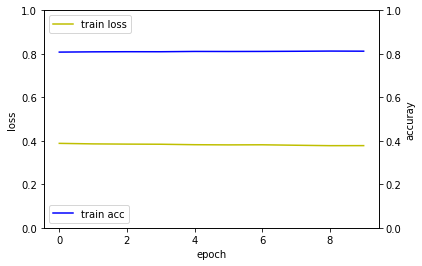

69978/69978 [==============================] - 28s 406us/step
loss_and_metrics : [1.1755285183575035, 0.6388722169790731]


In [0]:
# 4. Train model
hist = model.fit(df_train_features, y_train, epochs=10, batch_size=64)

# 5. Training process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. Evaluation
loss_and_metrics = model.evaluate(df_test_features, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))


In [0]:
sub_preds_deep = model.predict(df_test_features,batch_size=32)
sub_preds_deep

array([[0.29566485],
       [0.691137  ],
       [0.6819496 ],
       ...,
       [0.1079165 ],
       [0.01320081],
       [0.6819496 ]], dtype=float32)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving inquirerbasic.csv to inquirerbasic.csv


In [0]:
# Dictionary_Sentiment_Analysis
# Because the package used for prediction of 'Predict value' is formed with movie review data, it can be unsuitable for this project which analyzes reviews
# for drugs. To make up for this, we conducted additional emotional analysis using the Harvard emotional dictionary.

# import dictionary data
word_table = pd.read_csv("inquirerbasic.csv")

# checking the head of the dictionary
word_table.head(10)

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN
5,ABDICATE,H4,NaN,Negativ
6,ABHOR,H4,NaN,Negativ
7,ABIDE,H4,Positiv,NaN
8,ABILITY,H4Lvd,Positiv,NaN
9,ABJECT,H4,NaN,Negativ


In [0]:
# make list of sentiment
#Positiv word list   

temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list)

1637

In [0]:
#Negativ word list 

temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)

2006

In [0]:
##2. counting the word 98590

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

In [0]:
# decide sentiment
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,Year,month,day,day_of_week,season,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
149492,126702,Brimonidine,Rosacea,"""Never , never , never use this cream !!!!!! I...",1,2015-08-31,17,never never never use cream help way angri dis...,0,2015,8,31,Monday,2,NaN,NaN,NaN,0.5
36737,84765,Ethinyl estradiol / norgestimate,Birth Control,"""I was switched to this after about 9 months o...",10,2016-05-01,3,switch month mononessa ask switch happen anywa...,1,2016,5,1,Sunday,1,4.0,15.0,0.210526,0.0
87556,71559,Vraylar,Bipolar Disorde,"""I began at 1.5 then titrated to 3mg dosage. A...",3,2016-08-17,17,began titrat mg dosag first love medicin compl...,0,2016,8,17,Wednesday,2,NaN,NaN,NaN,0.5
44851,132320,Ativan,Anxiety,"""Ativan 0.5mg calms me down considerably withi...",5,2012-01-12,26,ativan mg calm consider within minut side effe...,0,2012,1,12,Thursday,4,7.0,6.0,0.538462,1.0
91917,177278,Duloxetine,Generalized Anxiety Disorde,"""My thoughts on Cymbalta: Cymbalta has left me...",1,2017-05-03,29,thought cymbalta cymbalta left fog no feel non...,0,2017,5,3,Wednesday,1,NaN,NaN,NaN,0.5


In [0]:
def userful_count(data):
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    data = pd.merge(data, grouped, on='condition', how='left')
    return data

df_test =  userful_count(df_test) 
df_test['usefulCount'] = df_test['usefulCount']/df_test['user_size']

In [0]:
df_test['deep_pred'] = sub_preds_deep
df_test['machine_pred'] = sub_preds_deep

df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic'])*df_test['usefulCount']

In [0]:
df_test = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test

total_pred
                                                               mean
condition                drugName                                  
ADHD                     Adderall                          0.062974
                         Adderall XR                       0.033902
                         Adzenys XR-ODT                    0.007920
                         Amantadine                        0.010693
                         Amphetamine                       0.013033
                         Amphetamine / dextroamphetamine   0.040462
                         Aptensio XR                       0.006355
                         Armodafinil                       0.027571
                         Atomoxetine                       0.045025
                         Bupropion                         0.064300
                         Catapres                          0.051660
                         Clonidine                         0.046737
                         Concerta                          0.054173
                         Cylert                            0.011518
                         Daytrana                          0.025375
                         Desoxyn                           0.117647
                         Desvenlafaxine                    0.000004
                         Dexedrine                         0.052566
                         Dexmethylphenidate                0.037549
                         Dextroamphetamine                 0.039448
                         Dextrostat                        0.028415
                         Dyanavel XR                       0.013153
                         Evekeo                            0.006473
                         Focalin                           0.039290
                         Focalin XR                        0.040924
                         Guanfacine                        0.060627
                         Intuniv                           0.065955
                         Kapvay                            0.090651
                         Lisdexamfetamine                  0.040106
                         Metadate CD                       0.034081
...                                                             ...
ibromyalgia              Nuvigil                           0.154420
                         Prednisone                        0.070940
                         Pregabalin                        0.128795
                         Pristiq                           0.081724
                         Prozac                            0.204572
                         Savella                           0.104699
                         Skelaxin                          0.083164
                         Sodium oxybate                    0.072285
                         Sterapred DS                      0.035624
                         Topamax                           0.049618
                         Topiramate                        0.041141
                         Tramadol                          0.087819
                         Trazodone                         0.043790
                         Ultram                            0.053524
                         Ultram ER                         0.085954
                         Venlafaxine                       0.058497
                         Xyrem                             0.217573
lic Acid Deficiency      Deplin                            7.878032
                         L-methylfolate                    8.154686
m Pain Disorde           Milnacipran                       0.000000
min)                     Alogliptin / metformin            0.196200
                         Dapagliflozin / metformin         0.210023
                         Empagliflozin / metformin         1.249960
                         Linagliptin / metformin           0.610623
                         Metformin                         7.444604
moterol)                 Arformoterol        

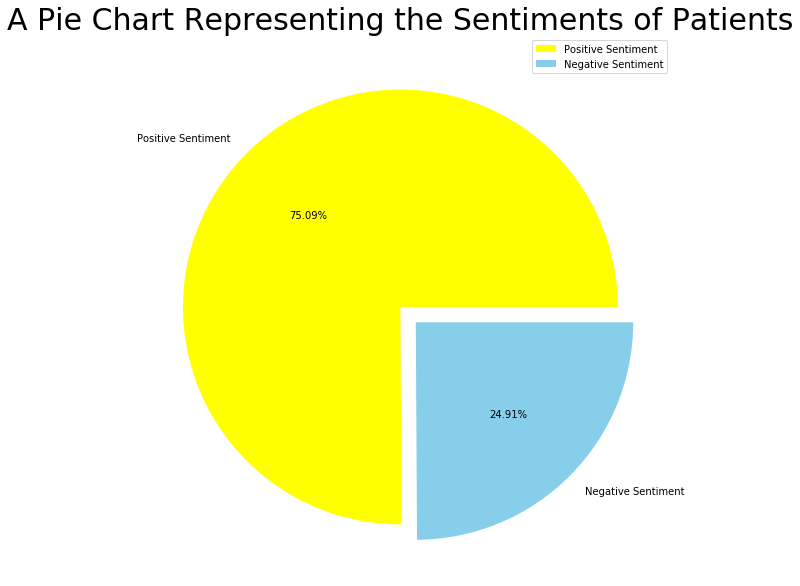

In [0]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()